# Model Analysis

## Import Modules

In [2]:
from RunParameters import RunParameters
from TDistribution import TDist

## Check Run Parameters

In [38]:
EPOCHS = '200k'
REF = '200k'
BKG = '10k'
MODEL = 5
WCLIP = 100
NTOYS = 150

DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/model_{MODEL}/'
# DATA_FOLDER = f'/lustre/cmswork/nlai/DRIFT_TIME/'
OUT_PATH = DATA_FOLDER + f'E{EPOCHS}R{REF}B{BKG}W{WCLIP}_model_{MODEL}'

DOF = 10
NFOLDER = 0

rPar = RunParameters(OUT_PATH, NFOLDER, NTOYS)
toys, w_clip, epochs, check_point_t, ref, bkg, sig, latent, layers = rPar.fetch_parameters()
rPar.print_parameters()

OUT_FILE_t = rPar.fetch_file()
OUT_FILE_t_history = rPar.fetch_history()


Folder name: E200000_latent3_layers1_wclip100.0_ntoy150_ref200000_bkg10000_sig0_patience1000
File name: E200000_latent3_layers1_wclip100.0_ntoy150_ref200000_bkg10000_sig0_patience1000_t.txt

Parameters:                                                                      
 Toys:          150                                              
 Latent space:  3                                            
 Layers:        1                                            
 W_clip:        100.0                                            
 Epochs:        200000                                            
 Patience:      1000                                     
 Ref, Bkg, Sig: 200000 10000 0 



## Model Analysis

In [40]:
BINS = 7
SAVE_FIG = 0

tDist = TDist(DOF, BINS, toys, epochs, check_point_t, w_clip, OUT_PATH, OUT_FILE_t, OUT_FILE_t_history, SAVE_FIG)
tDist.getT()
tDist.computeMedian()


Toys at disposal/Total toys: 150/150

Median t distribution:  12.290503999999999
Median p-value: 0.5000            Median significance: 0.0000            from t list
Median p-value: 0.2661            Median significance: 0.6247            from chi2 distribution


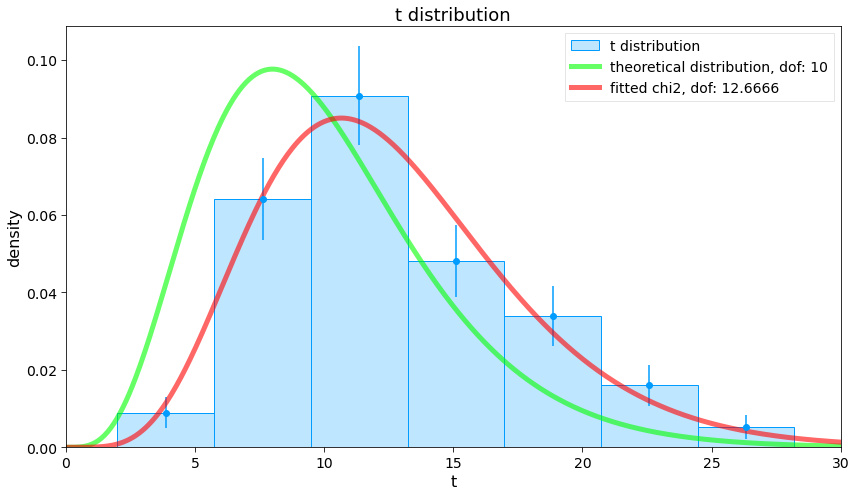

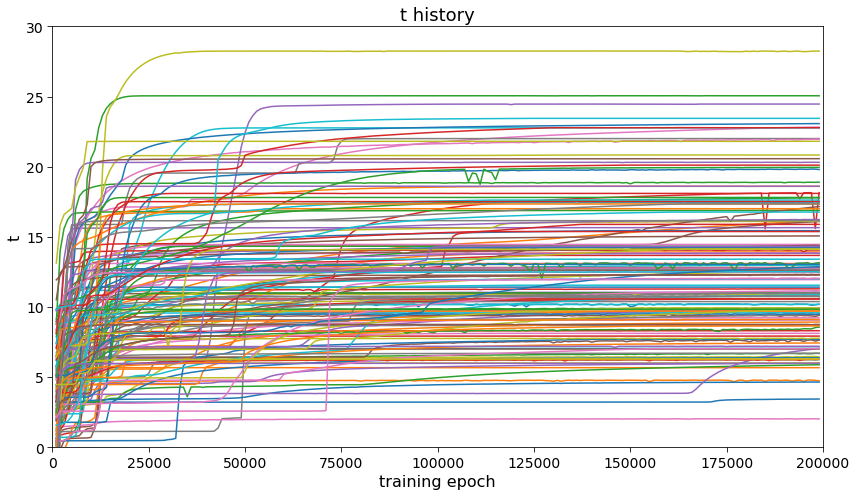

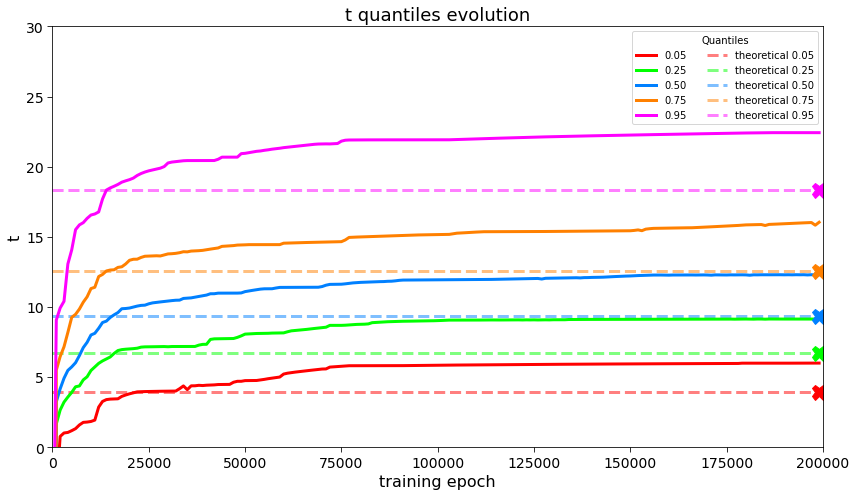

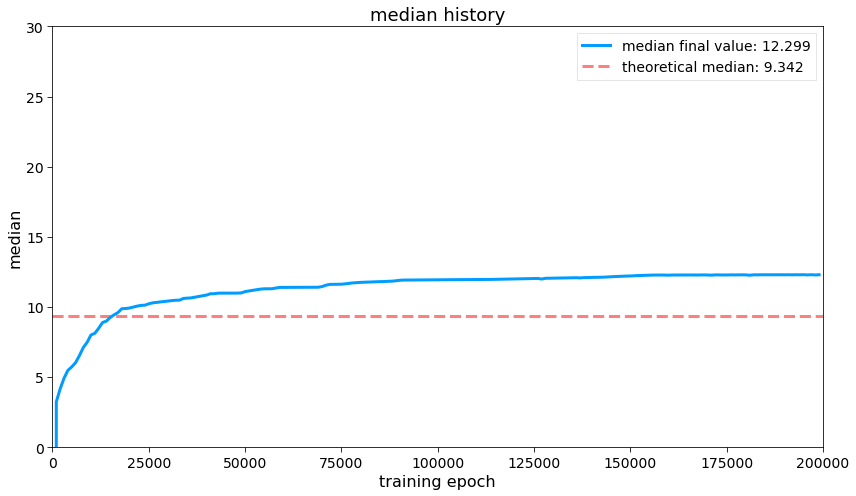

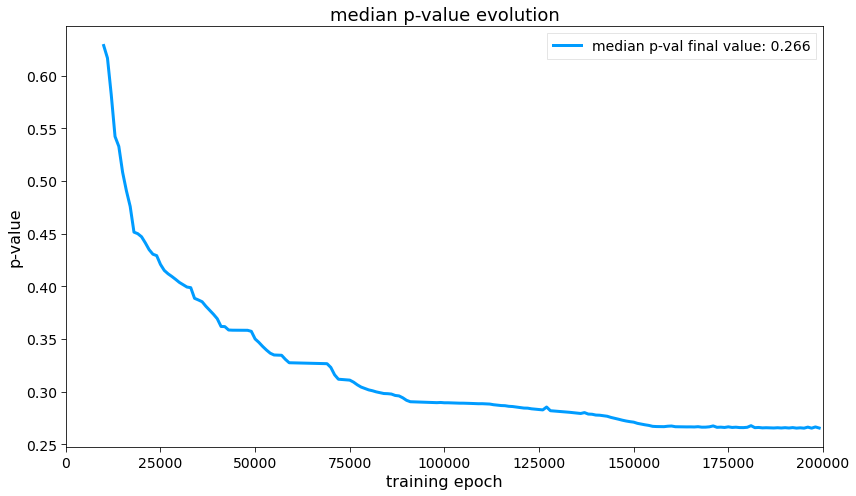

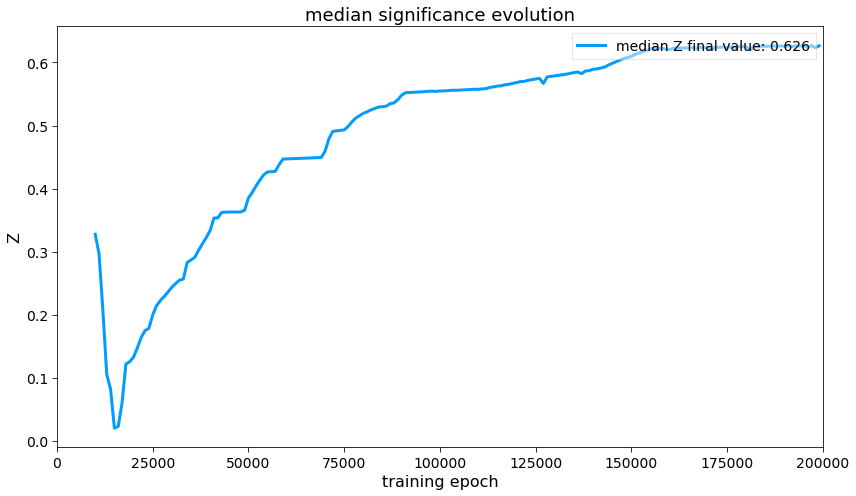

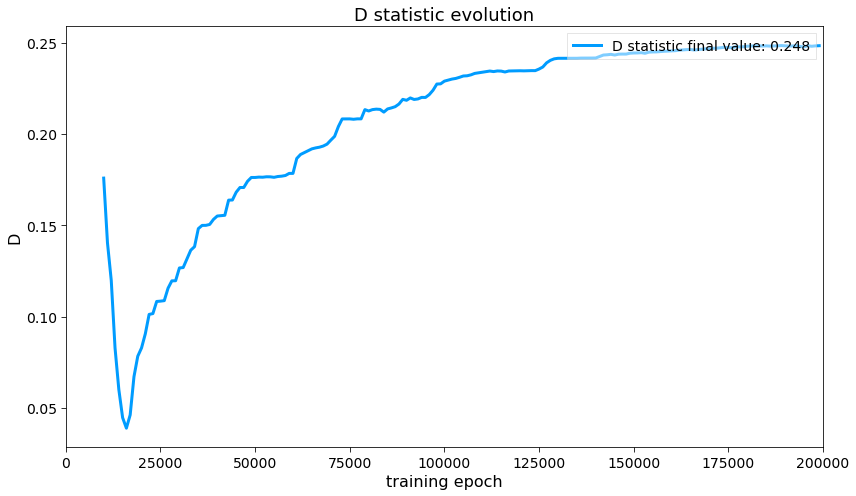

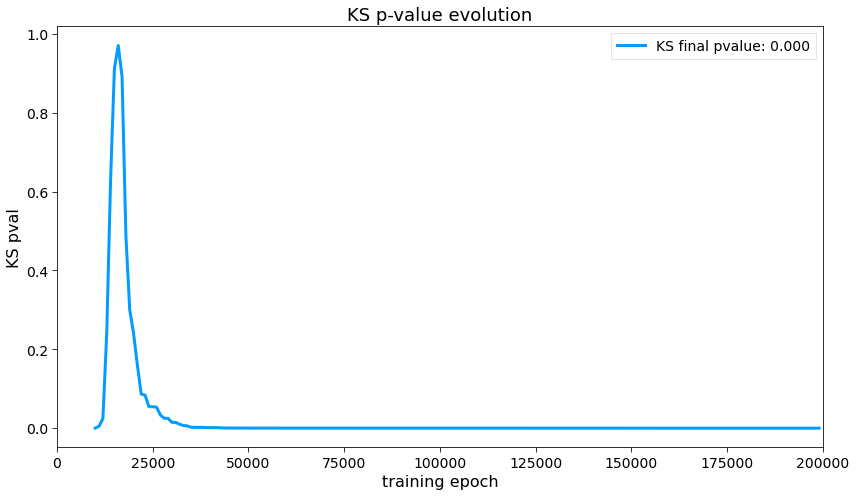

In [41]:
tDist.plotTdist()
tDist.plotThistory()
tDist.plotQuantilesEvo()
# tDist.plotChi2History()
# tDist.plotChi2Compatibility()
# tDist.plotChi2Compatibility2()
# tDist.plotPValHistory()
# tDist.plotSignificanceHistory()
tDist.plotMedianHistory()
tDist.plotMedianPval()
tDist.plotMedianZ()
tDist.ks_test_evo()

In [5]:
# import scipy
# import numpy as np
# import matplotlib.pyplot as plt
# dd=[]
# pp=[]
# for i in range(tDist.t_list_history.shape[1]):
#     D, Dpval = scipy.stats.kstest(
#             rvs=tDist.t_list_history[:,i],
#             cdf="chi2",
#             args=(10, 0, 1)
#         )
#     dd.append(D)
#     pp.append(Dpval)
    
# dd=np.array(dd)
# pp=np.array(pp)

In [6]:
# plt.plot(np.arange(0, 200), dd)
# plt.plot(np.arange(0, 200), pp)

In [7]:
# from KSTest import KS_test

In [8]:
# KSp = KS_test(
#     sample=tDist.t_list, 
#     dof=10,
#     Ntoys=100000
# )

# print(KSp)

In [9]:
# import scipy

In [10]:
# d, p = scipy.stats.kstest(
#     rvs=tDist.t_list,
#     cdf='chi2',
#     args=(10, 0, 1)
# )

# print(d, p)